In [139]:
import numpy as np 
from sklearn.linear_model import LinearRegression as LR 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 

import matplotlib.pyplot as plt 
import seaborn as sns 

#plt.style.use('seaborn-v0_8')
sns.set_style('darkgrid')
sns.set_palette('deep')
%config InlineBackend.figure_format = 'svg'

import tensorflow as tf 

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

# Model Evaluation and Selection 

A very important part of machine learning is to evaluate the performance of the model. 

A robust model is one that can generalize well to new data by avoiding underfitting and overfitting. In order to evaluate and validate a ML model or a neural network, a solid approach is to split the entire dataset into three subsets:

- Training set
- Cross-validation set (aka validation or development set) 
- Test set

We can take a look at different examples, such as regression and classification problems, as well as different architectures for neural networks.

## Regression

In [140]:
data = np.array([[1651.  ,  432.65],
       [1691.82,  454.94],
       [1732.63,  471.53],
       [1773.45,  482.51],
       [1814.27,  468.36],
       [1855.08,  482.15],
       [1895.9 ,  540.02],
       [1936.71,  534.58],
       [1977.53,  558.35],
       [2018.35,  566.42],
       [2059.16,  581.4 ],
       [2099.98,  596.46],
       [2140.8 ,  596.71],
       [2181.61,  619.45],
       [2222.43,  616.58],
       [2263.24,  653.16],
       [2304.06,  666.52],
       [2344.88,  670.59],
       [2385.69,  669.02],
       [2426.51,  678.91],
       [2467.33,  707.44],
       [2508.14,  710.76],
       [2548.96,  745.19],
       [2589.78,  729.85],
       [2630.59,  743.8 ],
       [2671.41,  738.2 ],
       [2712.22,  772.95],
       [2753.04,  772.22],
       [2793.86,  784.21],
       [2834.67,  776.43],
       [2875.49,  804.78],
       [2916.31,  833.27],
       [2957.12,  825.69],
       [2997.94,  821.05],
       [3038.76,  833.82],
       [3079.57,  833.06],
       [3120.39,  825.7 ],
       [3161.2 ,  843.58],
       [3202.02,  869.4 ],
       [3242.84,  851.5 ],
       [3283.65,  863.18],
       [3324.47,  853.01],
       [3365.29,  877.16],
       [3406.1 ,  863.74],
       [3446.92,  874.67],
       [3487.73,  877.74],
       [3528.55,  874.11],
       [3569.37,  882.8 ],
       [3610.18,  910.83],
       [3651.  ,  897.42]])

In [141]:
data.shape

(50, 2)

In [142]:
x = data[:, 0]
y = data[:, 1]

x.shape, y.shape

((50,), (50,))

In [143]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

x.shape, y.shape

((50, 1), (50, 1))

In [144]:
x

array([[1651.  ],
       [1691.82],
       [1732.63],
       [1773.45],
       [1814.27],
       [1855.08],
       [1895.9 ],
       [1936.71],
       [1977.53],
       [2018.35],
       [2059.16],
       [2099.98],
       [2140.8 ],
       [2181.61],
       [2222.43],
       [2263.24],
       [2304.06],
       [2344.88],
       [2385.69],
       [2426.51],
       [2467.33],
       [2508.14],
       [2548.96],
       [2589.78],
       [2630.59],
       [2671.41],
       [2712.22],
       [2753.04],
       [2793.86],
       [2834.67],
       [2875.49],
       [2916.31],
       [2957.12],
       [2997.94],
       [3038.76],
       [3079.57],
       [3120.39],
       [3161.2 ],
       [3202.02],
       [3242.84],
       [3283.65],
       [3324.47],
       [3365.29],
       [3406.1 ],
       [3446.92],
       [3487.73],
       [3528.55],
       [3569.37],
       [3610.18],
       [3651.  ]])

In [145]:
import pandas as pd

In [146]:
df_reg = pd.DataFrame({'Data': data[:, 0], 'Target': data[:, 1]})

In [147]:
df_reg

,Data,Target
0,1651.00,432.65
1,1691.82,454.94
2,1732.63,471.53
3,1773.45,482.51
4,1814.27,468.36
5,1855.08,482.15
6,1895.90,540.02
7,1936.71,534.58
8,1977.53,558.35
9,2018.35,566.42


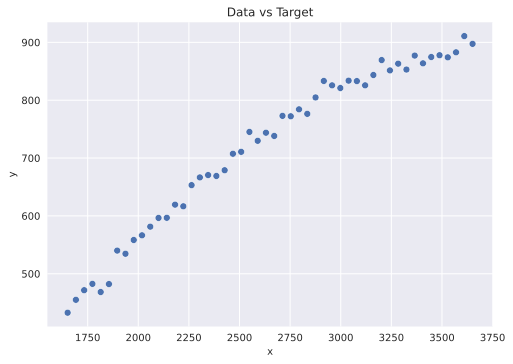

In [148]:
sns.scatterplot(data=df_reg, markers='X', x='Data', y='Target')
#plt.legend(title = 'points', labels=['target', 'data'], frameon=True, framealpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data vs Target')
plt.show()

## Split the dataset into training, cross-validation and test sets

+ **training set** - used to train the model
+ **cross-validation set** - used to evaluate the different model configurations, for example, you can use this to decide on what polynomial features tp add to your dataset
+ **test set** - used to give an estimate of the model's performance against new data

Fortunately, scikit-learn has a function that can split the dataset into these three subsets. The function is called `train_test_split` and it is part of the `model_selection` module. 

In [149]:
# Get 60% of the dataset as the training set and store the remaining 40% in temporary variables
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the remaining 40% (stored in x_, y_) into a half for cross validation and a half for the actual test set

x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# delete tmp variables

del x_, y_ 

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


Let's make a new dataframe with the split data. 

In [150]:
df_train = pd.DataFrame({'x_Train': x_train[:, 0], 'y_Train': y_train[:, 0]})
df_cv = pd.DataFrame({'x_Cross_Validation': x_cv[:, 0], 'y_Cross_Validation': y_cv[:, 0]})
df_test = pd.DataFrame({'x_Test': x_test[:, 0], 'y_Test': y_test[:, 0]})

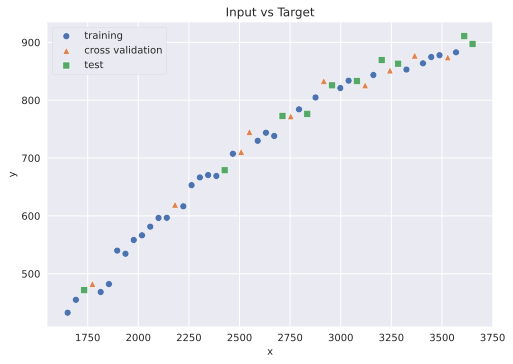

In [151]:
sns.scatterplot(data=df_train, x='x_Train', y='y_Train', marker='o')
sns.scatterplot(data=df_cv, x='x_Cross_Validation', y='y_Cross_Validation', marker='^')
sns.scatterplot(data=df_test, x='x_Test', y='y_Test', marker='s')
plt.title('Input vs Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', labels=['training', 'cross validation', 'test'], frameon=True, framealpha=1)
plt.show()

## Fit a linear regression model

### Feature scaling 

Scikit-learn has a `StandardScaler` class that can be used to scale the features. This scaler will subtract the mean and divide by the standard deviation.



In [152]:
scaler_linear = StandardScaler() # init the class with an instance 

X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


In [159]:
df_train['x_Train_scaled'] = X_train_scaled

In [160]:
df_train

,x_Train,y_Train,x_Train_scaled
0,3324.47,853.01,1.427161
1,2344.88,670.59,-0.276908
2,3487.73,877.74,1.711164
3,2630.59,743.80,0.220105
4,2589.78,729.85,0.149113
5,1814.27,468.36,-1.199944
6,2997.94,821.05,0.859138
7,2222.43,616.58,-0.489919
8,2875.49,804.78,0.646127
9,2059.16,581.40,-0.773939


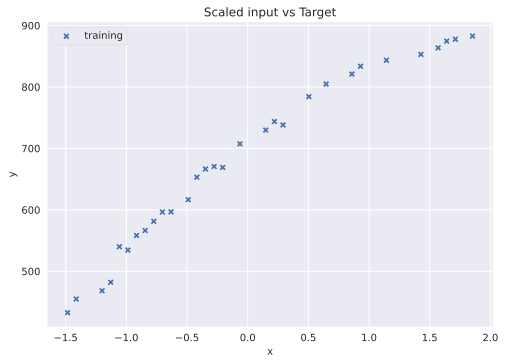

In [162]:
sns.scatterplot(data=df_train, x='x_Train_scaled', y='y_Train', marker='X')
#sns.scatterplot(data=df_cv, x='x_Cross_Validation', y='y_Cross_Validation', marker='^')
#sns.scatterplot(data=df_test, x='x_Test', y='y_Test', marker='s')
plt.title('Scaled input vs Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', labels=['training', 'cross validation', 'test'], frameon=True, framealpha=1)
plt.show()

### Train the model

We can use the `LinearRegression` class from scikit-learn to train the model. Other linear regressors are also available, such as `Ridge` and `Lasso`.

In [163]:
linear_model = LR() # init the class with an instance 

# Train 

linear_model.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluate the model 

We can evaluate the model using the mean squared error (MSE) on the training set and the cross-validation set. 

The MSE is defined as: 

$$ \displaystyle J_{train}(\vec{w}, b) = \frac{1}{2m_{train}} \left[ \sum_{i=1}^{m_{train}} \left(f_{\vec{w}, b}(\vec{x}^{(i)}_{train}) - y^{(i)}_{train}\right)^2 \right]$$

In [166]:
yhat_train = linear_model.predict(X_train_scaled)

mse_train = MSE(y_train, yhat_train) / 2

In [167]:
mse_train

406.18142643101237

The MSE for the cross-validation set is defined as:

$$ \displaystyle J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}} \left[ \sum_{i=1}^{m_{cv}} \left(f_{\vec{w}, b}(\vec{x}^{(i)}_{cv}) - y^{(i)}_{cv}\right)^2 \right]$$

where $m_{train}$ and $m_{cv}$ are the number of training and cross-validation examples, respectively.

Before that, it's important to scale the features of the cross-validation set as well, with a little caveat. 

In order to scale the cross validation set, you need to use the mean and standard deviation of the training set. This is because you don't want to use any information from the cross-validation set to train the model. 

We can use the `transform` method of the scaler to scale the cross-validation set, rather than the `fit_transform` method. 

In [169]:
# Scale the cross validation set using the mean and standard deviation of the training set

X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set 

yhat_cv = linear_model.predict(X_cv_scaled)

# Evaluate MSE 

mse_cv = MSE(y_cv, yhat_cv) / 2

mse_cv


Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85


551.7633686764407

## Adding polynomial features 

The scattered data points hint that there's a slowly flattening of a possible fit curve at greater values of $x$. A polynomial fit might be a good choice.

### Create the additional feautures

We can use the `PolynomialFeatures` class from scikit-learn to create the additional features. 

In [171]:
# init the class with an instance 

poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set 

X_train_mapped = poly.fit_transform(x_train)

# left column is x and right column is x²
X_train_mapped[:5]

array([[3.32447000e+03, 1.10521008e+07],
       [2.34488000e+03, 5.49846221e+06],
       [3.48773000e+03, 1.21642606e+07],
       [2.63059000e+03, 6.92000375e+06],
       [2.58978000e+03, 6.70696045e+06]])

We can scale the input features using the `StandardScaler` class, as we did before.

In [173]:
# init the class with an instance 

scaler_poly = StandardScaler()

# compute mean and standard deviation of the new training set, then transform it 

X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

X_train_mapped_scaled[:5]

array([[ 1.42716085,  1.47236975],
       [-0.27690826, -0.36461578],
       [ 1.71116367,  1.84024054],
       [ 0.22010538,  0.10558969],
       [ 0.14911337,  0.03512103]])

We can now train the model, while taking into account the required transformations, as we did before.

In [176]:
# Init the class with an instance 

model = LR()

# train 

model.fit(X_train_mapped_scaled, y_train)

# compute mse for the training set 

yhat_train_poly = model.predict(X_train_mapped_scaled)
print(f'Training MSE: {MSE(y_train, yhat_train_poly)/2}')

# add the polynomial features to the cross validation set 

X_cv_mapped = poly.transform(x_cv)

# scale the cross validation set using mean and std from the training set 

X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# compute mse for the cross validation set 

yhat_cv_poly = model.predict(X_cv_mapped_scaled)
print(f'Cross Validation MSE: {MSE(y_cv, yhat_cv_poly)/2}')

Training MSE: 49.115763074720526
Cross Validation MSE: 87.694664384358
